# Linear regression

This is an explanation on how to use pytorch for linear regression using the pytorch neural network module.

In [1]:
import numpy as np
import torch as tf
import torch.nn as nn
import matplotlib.pyplot as plt

#### Dataset creation
***

The equation that we are going to use to do the liner regression will be :$y = 2x + 1$

Generating the independant variable x and dependant variable y. Then converting the *list* --> *numpy array* --> *torch tensors.*

In [2]:
x = [i for i in range(11)]
x = np.array(x, dtype=np.float32) #float data type required for gradients
x = tf.from_numpy(x)
x_train = x.view(-1,1) # To take the transpose
print(x_train)

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])


In [3]:
y = [2*i+1 for i in range(11)]
y = np.array(y, dtype=np.float32)
y = tf.from_numpy(y)
y_train = y.view(-1,1)
print(y_train)

tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]])


#### Model building
***

We are going to define a class named _LinearRegression_ and then code the forward pass into it. Normally while creating a class we define __init__ for initilisation purposes(more details [here](https://www.youtube.com/watch?v=WIP3-woodlU)). In the case of multiple inheritance, we define _super()_ function to make sure that the __init__ of the parent class would be called only once(more details [here](https://www.youtube.com/watch?v=zS0HyfN7Pm4)).

The input arguments to the pytorch linear module is in form _Linear(input_dim, output_dim)_ , which means input_dim total size of the input features and output_dim the number of output classes. So if we have a 28X28 image passing as input with 10 class, then input_dim = 784 and output_dim = 10(more details [here](https://mc.ai/pytorch-layer-dimensions-what-sizes-should-they-be-and-why/) and [here](https://towardsdatascience.com/pytorch-layer-dimensions-what-sizes-should-they-be-and-why-4265a41e01fd)).

We are going to instantiate the model, since ours is simple straight line equation the x value will be a single value and output y will also be single value. Hence the input_dim and output_dim are both 1. This linear regression will model the data in the form of

$ y = Ax + c $

The A being the weight matrix that transforms the input x with a bias c to produce the output(more details [here](https://www.youtube.com/watch?v=rcc86nXKwkw)).


In [4]:
input_dim = 1
output_dim = 1

model = nn.Linear(input_dim, output_dim)

Creating the loss class. Loss is the difference betweent the model predicted output and original output. The loss is to be calculated and then optimized in such a way that after each training epoch the loss should reduce. Here Mean Square Error is taken for loss calculation.

$MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}-y)$

$\hat{y} - predicted\\$
$y - true value$

In [5]:
criterion = nn.MSELoss()

Next we define the optimizer that can help optimise the loss function such that the loss value is less, meaning the predicted value almost equal to the expected original value.

$\Theta = \Theta-\eta \Delta \underset{\Theta}{}$

In [6]:
learning_rate = 0.01
optimizer = tf.optim.SGD(model.parameters(),lr=learning_rate)

In [7]:
epochs = 100

for epoch in range(1,epochs+1):
    optimizer.zero_grad()  # to clear all values to prevent accumulation from previous epochs
    output = model(x_train) # forward passing
    loss = criterion(output, y_train) # loss calculation wrt to the original output
    loss.backward()
    optimizer.step()
    print("epoch {}, loss {}".format(epoch,loss))

epoch 1, loss 115.20117950439453
epoch 2, loss 9.804228782653809
epoch 3, loss 1.2027825117111206
epoch 4, loss 0.49668824672698975
epoch 5, loss 0.43464395403862
epoch 6, loss 0.42518168687820435
epoch 7, loss 0.4200579822063446
epoch 8, loss 0.4153364896774292
epoch 9, loss 0.4106961488723755
epoch 10, loss 0.4061095118522644
epoch 11, loss 0.4015747010707855
epoch 12, loss 0.3970903158187866
epoch 13, loss 0.3926560580730438
epoch 14, loss 0.38827160000801086
epoch 15, loss 0.3839355707168579
epoch 16, loss 0.3796485662460327
epoch 17, loss 0.3754090368747711
epoch 18, loss 0.3712168037891388
epoch 19, loss 0.36707165837287903
epoch 20, loss 0.36297252774238586
epoch 21, loss 0.358919233083725
epoch 22, loss 0.35491111874580383
epoch 23, loss 0.3509478271007538
epoch 24, loss 0.34702908992767334
epoch 25, loss 0.34315383434295654
epoch 26, loss 0.33932146430015564
epoch 27, loss 0.33553239703178406
epoch 28, loss 0.331785649061203
epoch 29, loss 0.32808053493499756
epoch 30, loss 0.

#### Data comparision
***

In [8]:
predicted = model(x_train) # y = 2x+1
print(predicted)

tensor([[ 0.2848],
        [ 2.3878],
        [ 4.4908],
        [ 6.5938],
        [ 8.6968],
        [10.7998],
        [12.9028],
        [15.0058],
        [17.1088],
        [19.2118],
        [21.3147]], grad_fn=<AddmmBackward>)


In [9]:
print(y_train) # actual output

tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]])


#### Graph plotting
***

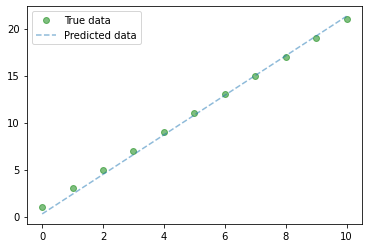

In [10]:
plt.clf() # to clear the figure

predicted = predicted.detach().numpy() # To remove the gradient (https://github.com/dask/distributed/pull/2586)

plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)  #go mean green dots
plt.plot(x_train,predicted, '--',label='Predicted data',alpha=0.5)
plt.legend() # https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/#:~:text=The%20attribute%20Loc%20in%20legend,corner%20of%20the%20axes%2Ffigure.
plt.show() # https://stackoverflow.com/questions/23141452/difference-between-plt-draw-and-plt-show-in-matplotlib